Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

Loading the Data

In [2]:
train = pd.read_csv('loan_train.csv')

test = pd.read_csv('loan_test.csv')

In [3]:
train.shape

(614, 13)

In [4]:
# Features in the Dataset

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Understanding the Data

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
# To find the data types

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Univariate Analysis

## Univariate Analysis for Categorical Variables

In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

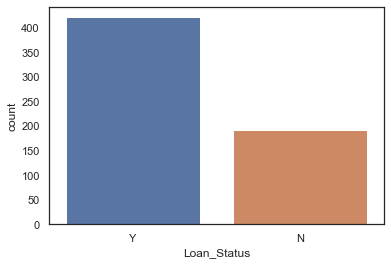

In [13]:
sns.countplot(x='Loan_Status', data=train)

In [14]:
train["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
train["Gender"].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

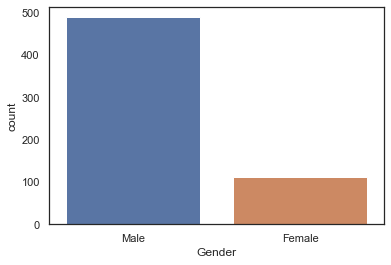

In [16]:
sns.countplot(x='Gender', data=train)

In [17]:
train["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
train["Dependents"].value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

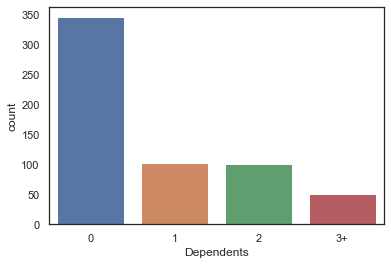

In [19]:
sns.countplot(x='Dependents', data=train)

In [20]:
train["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [21]:
train["Education"].value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

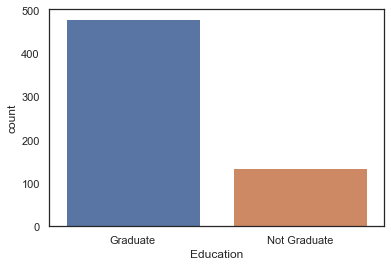

In [22]:
sns.countplot(x='Education', data=train)

In [23]:
train["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

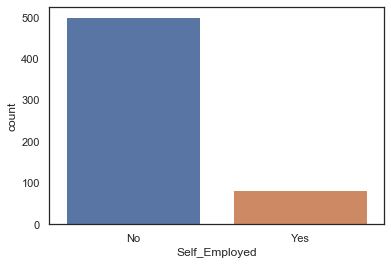

In [25]:
sns.countplot(x='Self_Employed', data=train)

In [26]:
train["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [27]:
train["Credit_History"].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

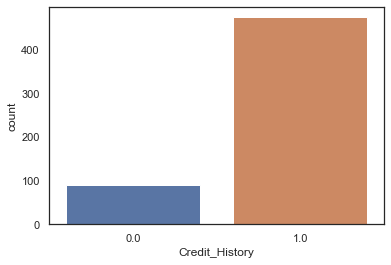

In [28]:
sns.countplot(x='Credit_History', data=train)

In [29]:
train["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [30]:
train["Property_Area"].value_counts(normalize=True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

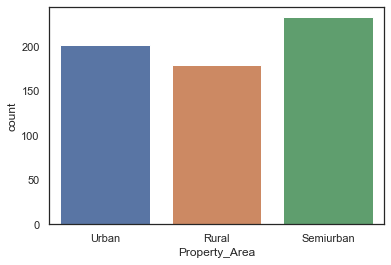

In [31]:
sns.countplot(x='Property_Area', data=train)

In [32]:
train["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [33]:
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

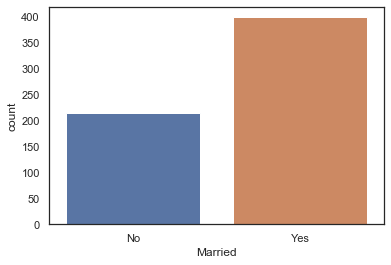

In [34]:
sns.countplot(x='Married', data=train)

In [35]:
print(train['Gender'].isnull().sum()) 
print(train['Married'].isnull().sum()) 
print(train['Dependents'].isnull().sum()) 
print(train['Education'].isnull().sum()) 
print(train['Credit_History'].isnull().sum()) 
print(train['Property_Area'].isnull().sum()) 
print(train['Loan_Status'].isnull().sum()) 

13
3
15
0
50
0
0


## Univartiate Analysis for Continuous Variables

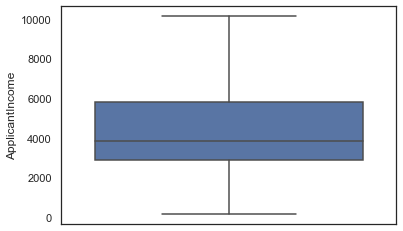

In [36]:
sns.boxplot(x="ApplicantIncome", data=train, orient='vertical', showfliers=False)

## Displaying the Outliers 

In [37]:
app_income = train["ApplicantIncome"]

In [38]:
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print(q1,q2,q3)

2877.5 3812.5 5795.0


In [39]:
iqr = q3 - q1

In [40]:
iqr

2917.5

In [41]:
print("Higher outliers :", (app_income > (q3 + 1.5 * iqr)).sum())
print("Lower outliers : ", (app_income < (q1 - 1.5 * iqr)).sum())

Higher outliers : 50
Lower outliers :  0


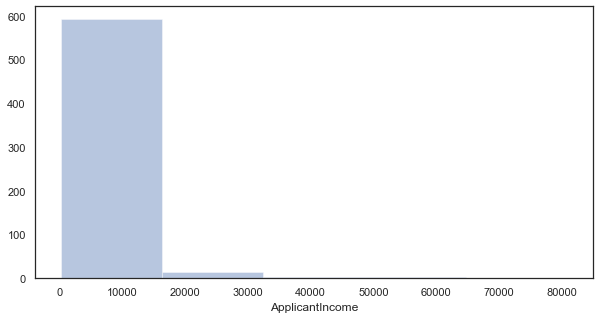

In [42]:
sns.distplot(train["ApplicantIncome"], bins = 5, kde=False)
plt.gcf().set_size_inches(10,5)

Text(0.5, 1.0, 'Applicant Income by Gender')

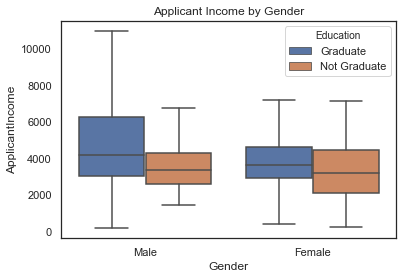

In [43]:
sns.boxplot(x="Gender", y="ApplicantIncome", hue="Education", data=train, showfliers=False)
plt.title("Applicant Income by Gender")

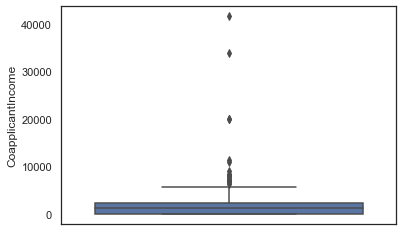

In [44]:
sns.boxplot(x="CoapplicantIncome", data=train, orient='vertical', showfliers=True)

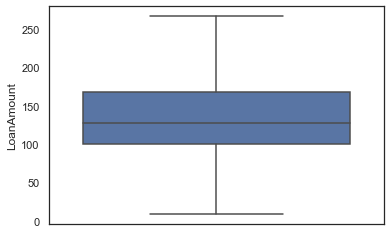

In [45]:
sns.boxplot(train["LoanAmount"], orient='vertical', showfliers=False)

d:\Anaconda4\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\Anaconda4\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


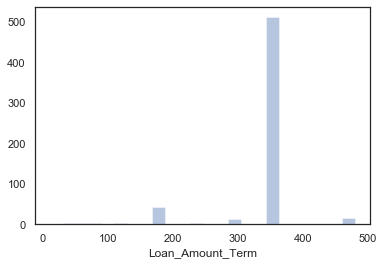

In [46]:
sns.distplot(train["Loan_Amount_Term"], kde=False)

## Bivariate Analysis

In [47]:
train.pivot_table(index='Property_Area', columns="Loan_Status", values="Loan_ID", aggfunc=len)

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [48]:
train.groupby(['Gender','Education'])['ApplicantIncome'].mean()

Gender  Education   
Female  Graduate        4646.467391
        Not Graduate    4629.700000
Male    Graduate        5992.345745
        Not Graduate    3630.061947
Name: ApplicantIncome, dtype: float64

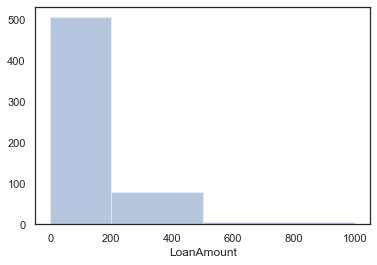

In [49]:
sns.distplot(train['LoanAmount'], bins=[0,200,500,1000], kde=False)

In [50]:
d = train.groupby(by=["Loan_Status", "Married"], as_index=False)['Loan_ID'].count()
print(d)

  Loan_Status Married  Loan_ID
0           N      No       79
1           N     Yes      113
2           Y      No      134
3           Y     Yes      285


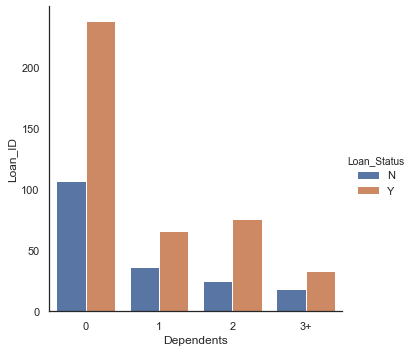

In [51]:
d = train.groupby(by=["Loan_Status","Dependents"], as_index=False)['Loan_ID'].count()
sns.catplot(x="Dependents", y="Loan_ID", hue='Loan_Status', data=d, kind='bar')

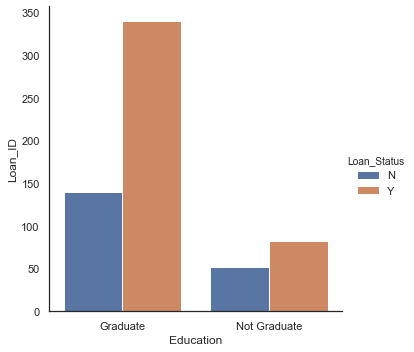

In [52]:
d = train.groupby(by=["Loan_Status", "Education"], as_index=False)['Loan_ID'].count()
sns.catplot(x="Education", y="Loan_ID", hue='Loan_Status', data=d, kind='bar')

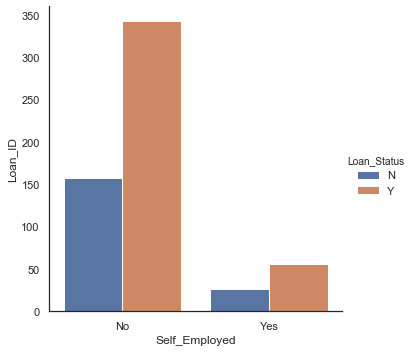

In [53]:
d = train.groupby(by=["Loan_Status", "Self_Employed"], as_index=False)['Loan_ID'].count()
sns.catplot(x="Self_Employed", y="Loan_ID", hue='Loan_Status', data=d, kind='bar')

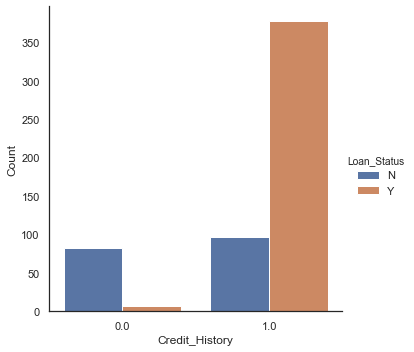

In [54]:
d = train.groupby(by=["Loan_Status","Credit_History"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
sns.catplot(x="Credit_History",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Property_Area  Count
0           N         Rural     69
1           N     Semiurban     54
2           N         Urban     69
3           Y         Rural    110
4           Y     Semiurban    179
5           Y         Urban    133


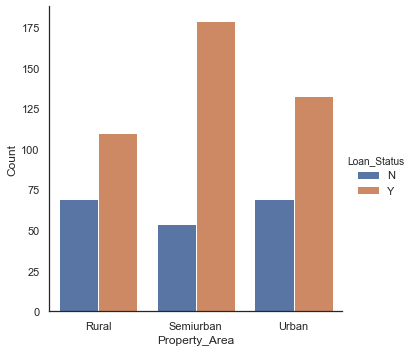

In [55]:
d = train.groupby(by=["Loan_Status","Property_Area"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Property_Area",y="Count", hue="Loan_Status", data=d, kind="bar")

# Making bins for Applicant Income Variable

In [56]:
bins=[0,2500,4000, 6000,85000]
group=['Low','Average','High','Very High']

train['Income_Bin'] = pd.cut(train['ApplicantIncome'], bins,labels = group)

In [57]:
train[['ApplicantIncome','Income_Bin']]

,ApplicantIncome,Income_Bin
0,5849,High
1,4583,High
2,3000,Average
3,2583,Average
4,6000,High
5,5417,High
6,2333,Low
7,3036,Average
8,4006,High
9,12841,Very High


  Loan_Status Income_Bin  Count
0           N        Low     34
1           N    Average     67
2           N       High     45
3           N  Very High     46
4           Y        Low     74
5           Y    Average    159
6           Y       High     98
7           Y  Very High     91


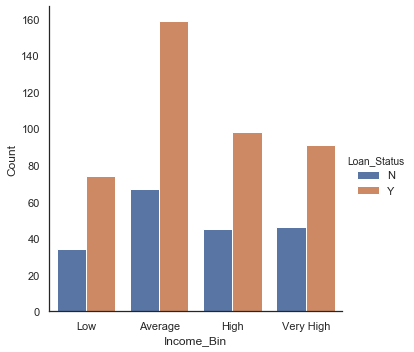

In [58]:
d = train.groupby(by=["Loan_Status","Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

## Making bins for Coapplicant income variable

In [59]:
bins = [-1,1000,3000,42000]
group = ['Low', 'Avreage','High']
train['Coapplicant_Income_Bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

  Loan_Status Coapplicant_Income_Bin  Count
0           N                    Low     99
1           N                Avreage     61
2           N                   High     32
3           Y                    Low    196
4           Y                Avreage    161
5           Y                   High     65


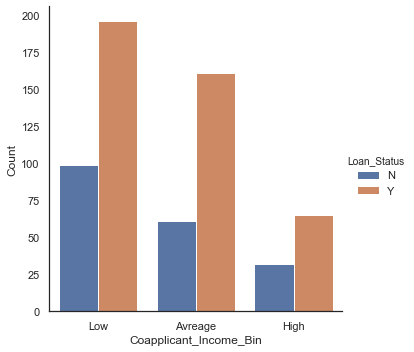

In [61]:
d = train.groupby(by=["Loan_Status", "Coapplicant_Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Coapplicant_Income_Bin", y = "Count", hue = "Loan_Status", data=d, kind="bar")

# Making bins for LoanAmount Variable

In [62]:
bins =[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_Bin']= pd.cut(train['LoanAmount'], bins, labels=group)
train[['LoanAmount', 'LoanAmount_Bin']]

,LoanAmount,LoanAmount_Bin
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
5,267.0,High
6,95.0,Low
7,158.0,Average
8,168.0,Average
9,349.0,High


  Loan_Status LoanAmount_Bin  Count
0           N            Low     47
1           N        Average    103
2           N           High     31
3           Y            Low    107
4           Y        Average    255
5           Y           High     49


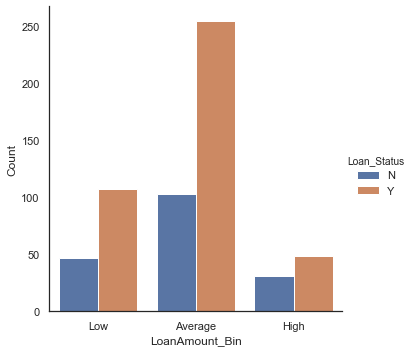

In [65]:
d = train.groupby(by=["Loan_Status", "LoanAmount_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="LoanAmount_Bin", y="Count", data=d, hue="Loan_Status", kind="bar")

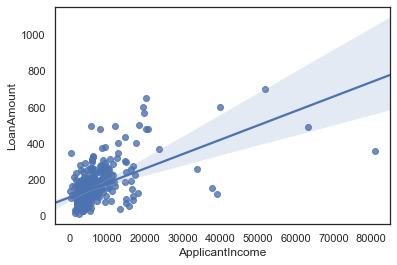

In [66]:
sns.regplot(x="ApplicantIncome", y="LoanAmount", data=train)

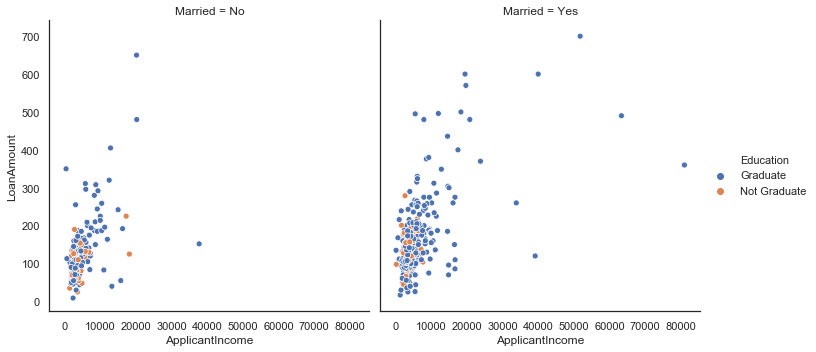

In [67]:
sns.relplot(x="ApplicantIncome", y="LoanAmount", data=train, hue="Education", col="Married")

## Data Wrangling

In [68]:
# To Drop the new variables 

train = train.drop(['Income_Bin', 'LoanAmount_Bin', 'Coapplicant_Income_Bin'], axis=1)

In [69]:
# Dependents

train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [70]:
## converting the Dependents to Strings

train['Dependents'] = train["Dependents"].astype('str')

In [71]:
## Replacing 3+ in Dependents variable with 3

train['Dependents'].replace(to_replace = ['0','1','2','3+'], value=['0','1','2','3'], inplace=True)

## Loan_Status

In [72]:
# replacing X and Y Variables with 0 and 1 respectively

train['Loan_Status'].replace(to_replace=['N','Y'], value=['0','1'], inplace=True)

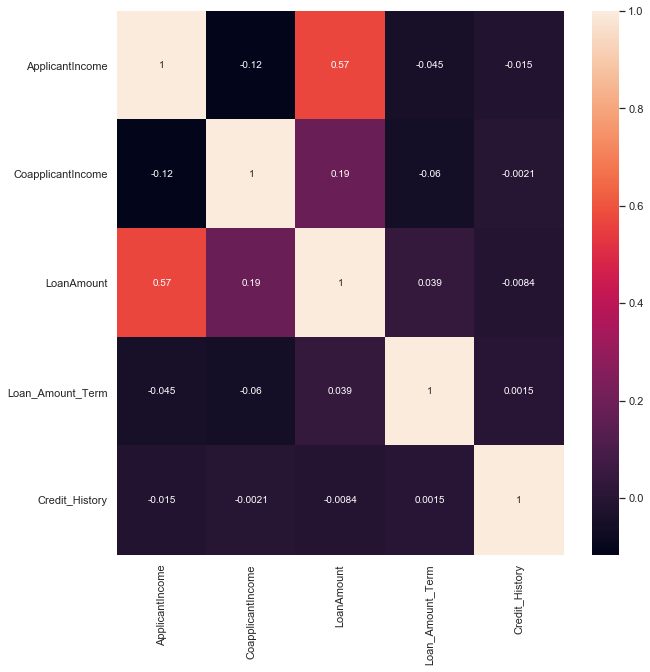

In [76]:
## Print Correlation Matrix to understand the relationship between the variables

matrix = train.corr()
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(10,10)

## Missing Value & Outlier Treatment

In [79]:
# Checking the Missing Values

s = train.isnull().sum()
s[s>0]

Gender              13
Married              3
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

In [80]:
# replacing the missing values with the mode

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [83]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [87]:
dmode = train['Dependents'].mode()[0]

In [88]:
train.loc[train['Dependents'] == 'nan', 'Dependents'] = dmode

In [89]:
(train['Dependents'] == 'nan').isnull().sum()

0

In [90]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [91]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [92]:
train['LoanAmount'].mean(), train['LoanAmount'].median()

(146.41216216216216, 128.0)

# Replacing Missing Values

In [93]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [94]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

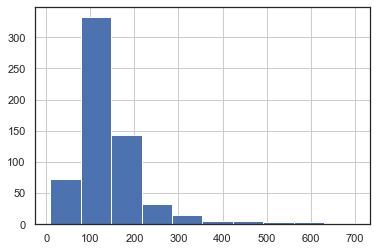

In [97]:
train['LoanAmount'].hist(bins=10)

## Removing Skewness in LoanAmount variable by log transformation

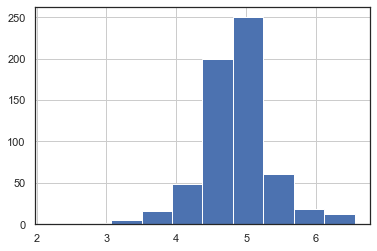

In [98]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=10)

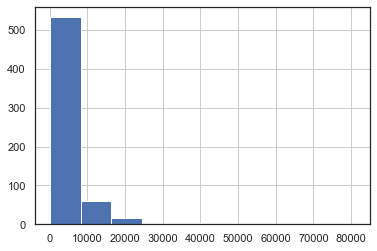

In [99]:
train['ApplicantIncome'].hist(bins=10)

## Removing Skewness in ApplicantIncome Variable by the log transformation

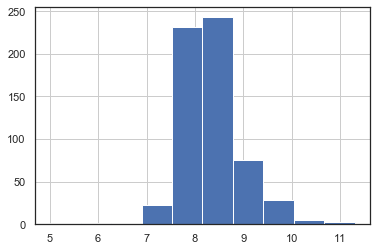

In [100]:
train['ApplicantIncome_log'] = np.log(train['ApplicantIncome'])
train['ApplicantIncome_log'].hist(bins=10)

## Drop Loan_ID column

In [101]:
train = train.drop('Loan_ID', axis=1)

In [102]:
y = train.Loan_Status
X = train.drop('Loan_Status', axis=1)

In [103]:
X.drop(['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

In [104]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'LoanAmount_log',
       'ApplicantIncome_log'],
      dtype='object')

In [105]:
# Adding Dummies to the Dataset
X = pd.get_dummies(X)

In [106]:
X.shape

(614, 19)

In [107]:
!!cd

['C:\\Users\\ram\\Anaconda\\Loan']

In [108]:
# save the dataframe

train.to_excel("final_train.xls", index=False)

# Model Building Using Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [110]:
## spliting the data into test and train

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 1)

In [111]:
X_train.shape, y_train.shape

((491, 19), (491,))

In [112]:
## Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)

d:\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy_score :', score)

Accuracy_score : 0.8048780487804879


# Display Confusion Matrix

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16, 23],
       [ 1, 83]], dtype=int64)

## Display the Classification Report

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



In [117]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'ApplicantIncome_log'],
      dtype='object')

## Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [120]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('accuracy_score', score)

accuracy_score 0.7723577235772358


In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63        39
           1       0.83      0.85      0.84        84

    accuracy                           0.77       123
   macro avg       0.74      0.73      0.73       123
weighted avg       0.77      0.77      0.77       123



## Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

d:\Anaconda4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)

accuracy_score 0.7560975609756098


## Naive Bayes

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [130]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)

accuracy_score 0.8048780487804879


In [131]:
confusion_matrix(y_test, y_pred)

array([[16, 23],
       [ 1, 83]], dtype=int64)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



## Support Vector Machines 

In [134]:
from sklearn.svm import SVC

In [135]:
model = SVC()
model.fit(X_train, y_train)

d:\Anaconda4\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [137]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)

accuracy_score 0.7642276422764228


In [138]:
confusion_matrix(y_test, y_pred)

array([[13, 26],
       [ 3, 81]], dtype=int64)

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.33      0.47        39
           1       0.76      0.96      0.85        84

    accuracy                           0.76       123
   macro avg       0.78      0.65      0.66       123
weighted avg       0.77      0.76      0.73       123

